# Arctic Project in Random Forest (Testing)

## Import libraries

In [1]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



## Read file

In [2]:
arctic <- read.csv("arctic_data.csv",stringsAsFactors = F)

## Train model

In [3]:
mtry_1 <- randomForest(Area~Rainfall+Daylight+Population+CO2+Ozone
                       +OceanTemperature_NorthernHemisphere
                       +LandTemperature_NorthernHemisphere
                       +MinTemperature_NorthSlopeAlaska
                       +GDP_WORLD, data = arctic, mtry=2, ntree=300)

mtry_2<-randomForest(Area~Rainfall+Daylight+Population+CO2+Ozone
                       +OceanTemperature_NorthernHemisphere
                       +LandTemperature_NorthernHemisphere
                       +MinTemperature_NorthSlopeAlaska
                       +GDP_WORLD, data = arctic, mtry=3, ntree=300)

mtry_3<-randomForest(Area~Rainfall+Daylight+Population+CO2+Ozone
                       +OceanTemperature_NorthernHemisphere
                       +LandTemperature_NorthernHemisphere
                       +MinTemperature_NorthSlopeAlaska
                       +GDP_WORLD, data = arctic, mtry=4, ntree=300)

mtry_4<-randomForest(Area~Rainfall+Daylight+Population+CO2+Ozone
                       +OceanTemperature_NorthernHemisphere
                       +LandTemperature_NorthernHemisphere
                       +MinTemperature_NorthSlopeAlaska
                       +GDP_WORLD, data = arctic, mtry=5, ntree=300)

mtry_5<-randomForest(Area~Rainfall+Daylight+Population+CO2+Ozone
                       +OceanTemperature_NorthernHemisphere
                       +LandTemperature_NorthernHemisphere
                       +MinTemperature_NorthSlopeAlaska
                       +GDP_WORLD, data = arctic, mtry=6, ntree=300)

## Plot result (the error tends to be stable when tree = 200)

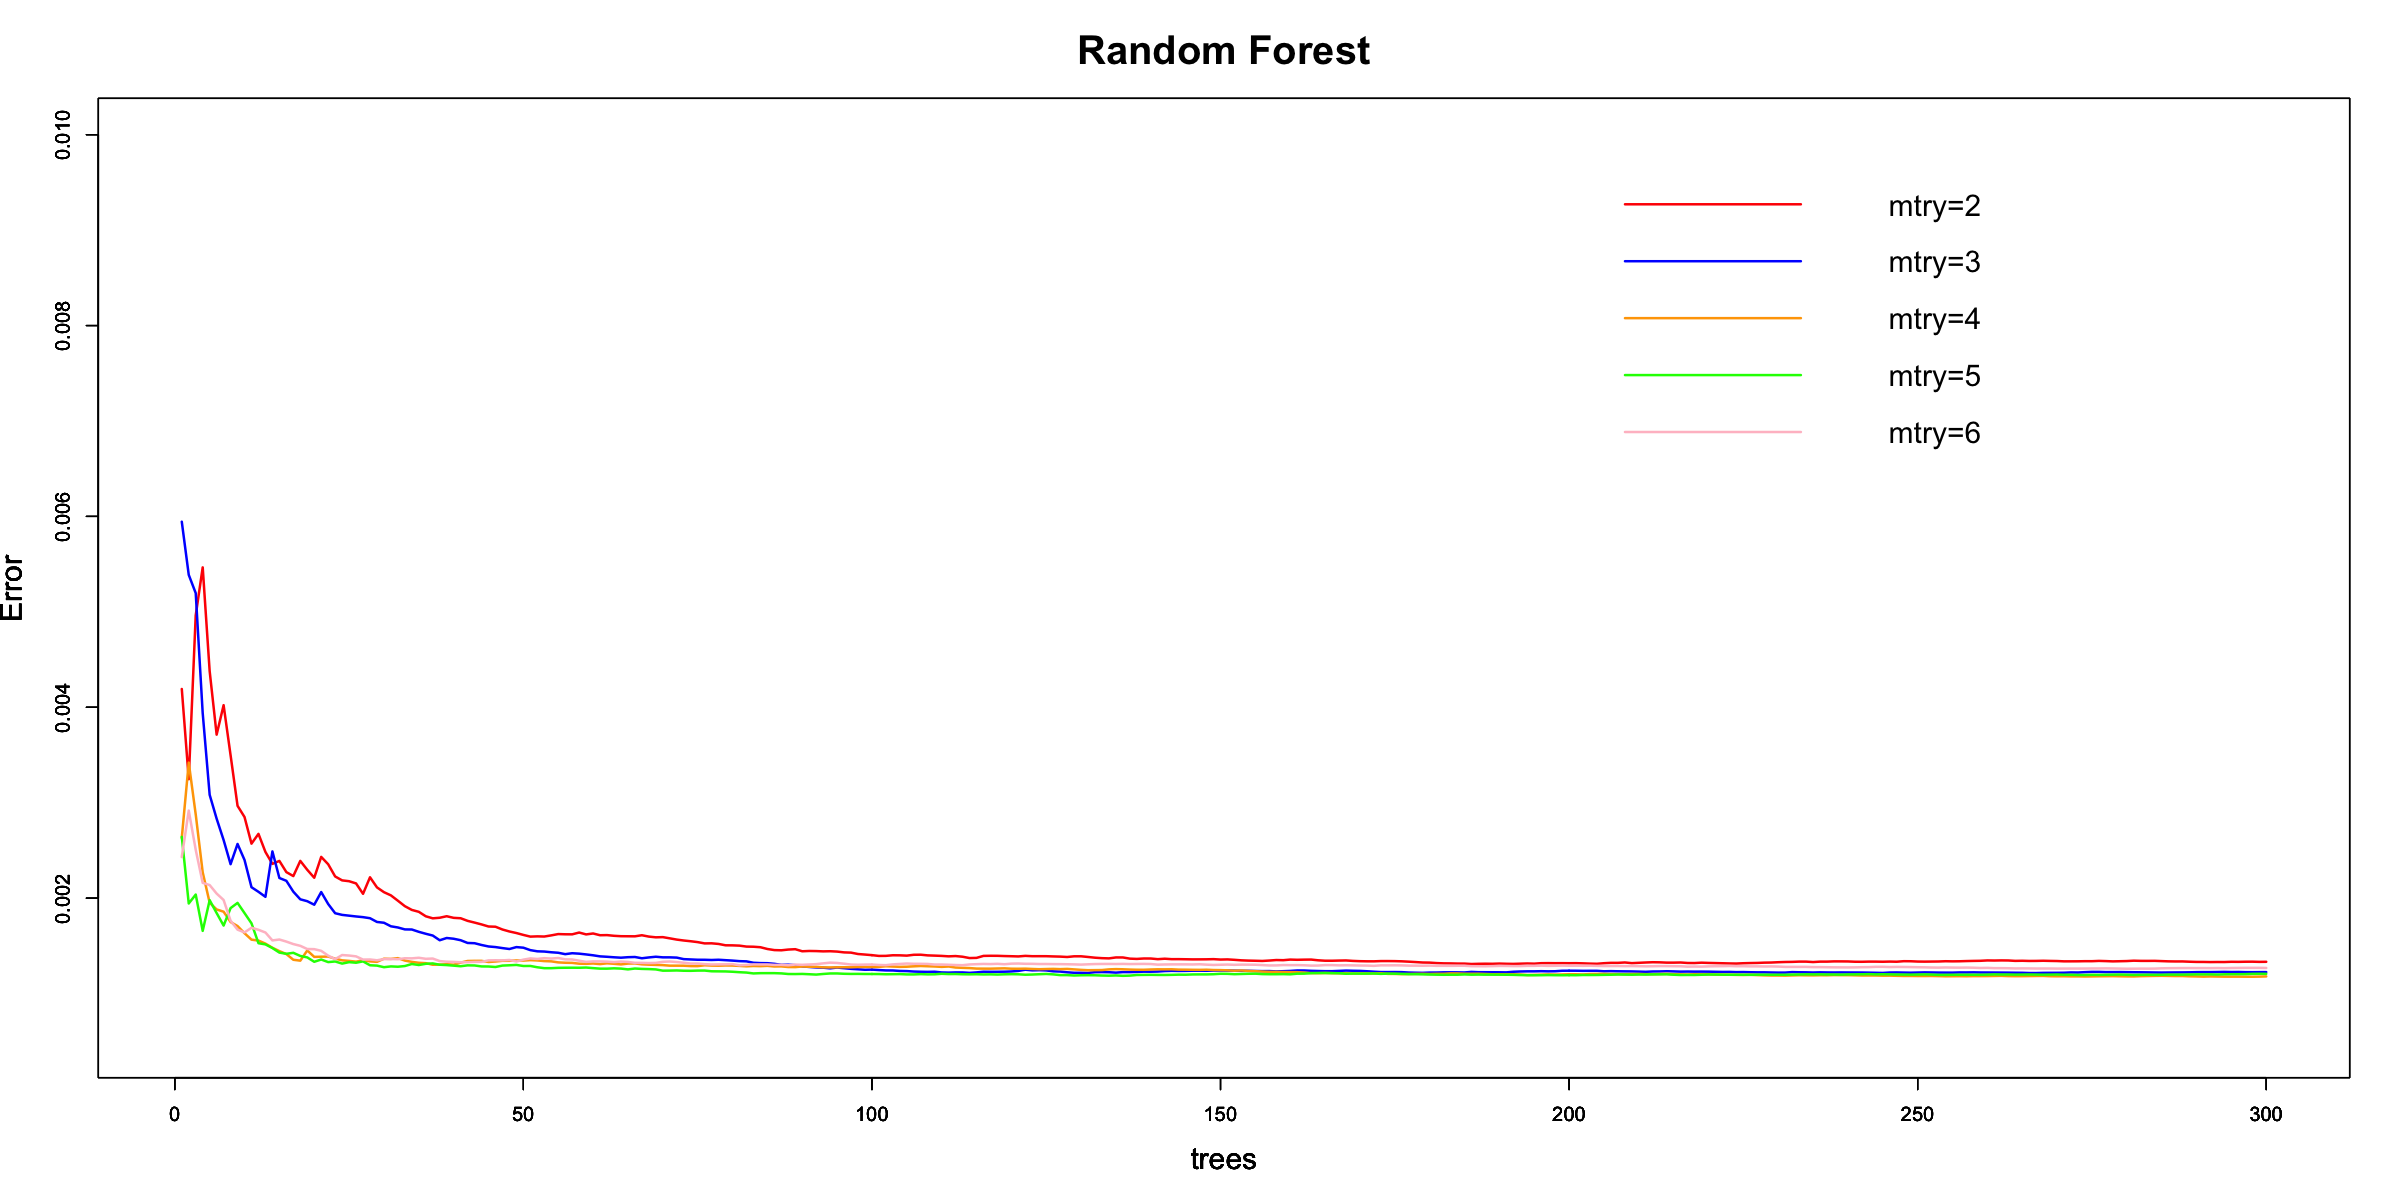

In [4]:
options(repr.plot.width=20, repr.plot.height=10)

plot(mtry_1,col='red',ylim=c(0.0005,0.010),lwd = '2',cex.lab=1.5, main='')
par(new=TRUE)
plot(mtry_2,col='blue',ylim=c(0.0005,0.010),lwd ='2',cex.lab=1.5, main='')
par(new=TRUE)
plot(mtry_3,col='orange',ylim=c(0.0005,0.010),lwd = '2',cex.lab=1.5, main='')
par(new=TRUE)
plot(mtry_4,col='green',ylim=c(0.0005,0.010),lwd = '2',cex.lab=1.5, main='')
par(new=TRUE)
plot(mtry_5,col='pink',ylim=c(0.0005,0.010),lwd = '2',cex.lab=1.5, main='')

# title
title(main = list("Random Forest", cex = 2, col = "black", font = 2))

legend("topright", inset=.05, c("mtry=2","mtry=3","mtry=4","mtry=5","mtry=6"),bty = 'n',
       lty=c(1,1,1,1,1),col=c("red","blue","orange","green","pink"),lwd =c(2, 2),cex = 1.5)

## Load and tidy result (use tree = 200)

In [5]:
mse1 <- as.data.frame(mtry_1$mse)
mse2 <- as.data.frame(mtry_2$mse)
mse3 <- as.data.frame(mtry_3$mse)
mse4 <- as.data.frame(mtry_4$mse)
mse5 <- as.data.frame(mtry_5$mse)

test <- cbind(as.data.frame(t(cbind(mse1,mse2,mse3,mse4,mse5)))[,c(200)],
              as.data.frame(c(2,3,4,5,6)))

## Plot mtry vs error ± and choose mtry for testing and visulization

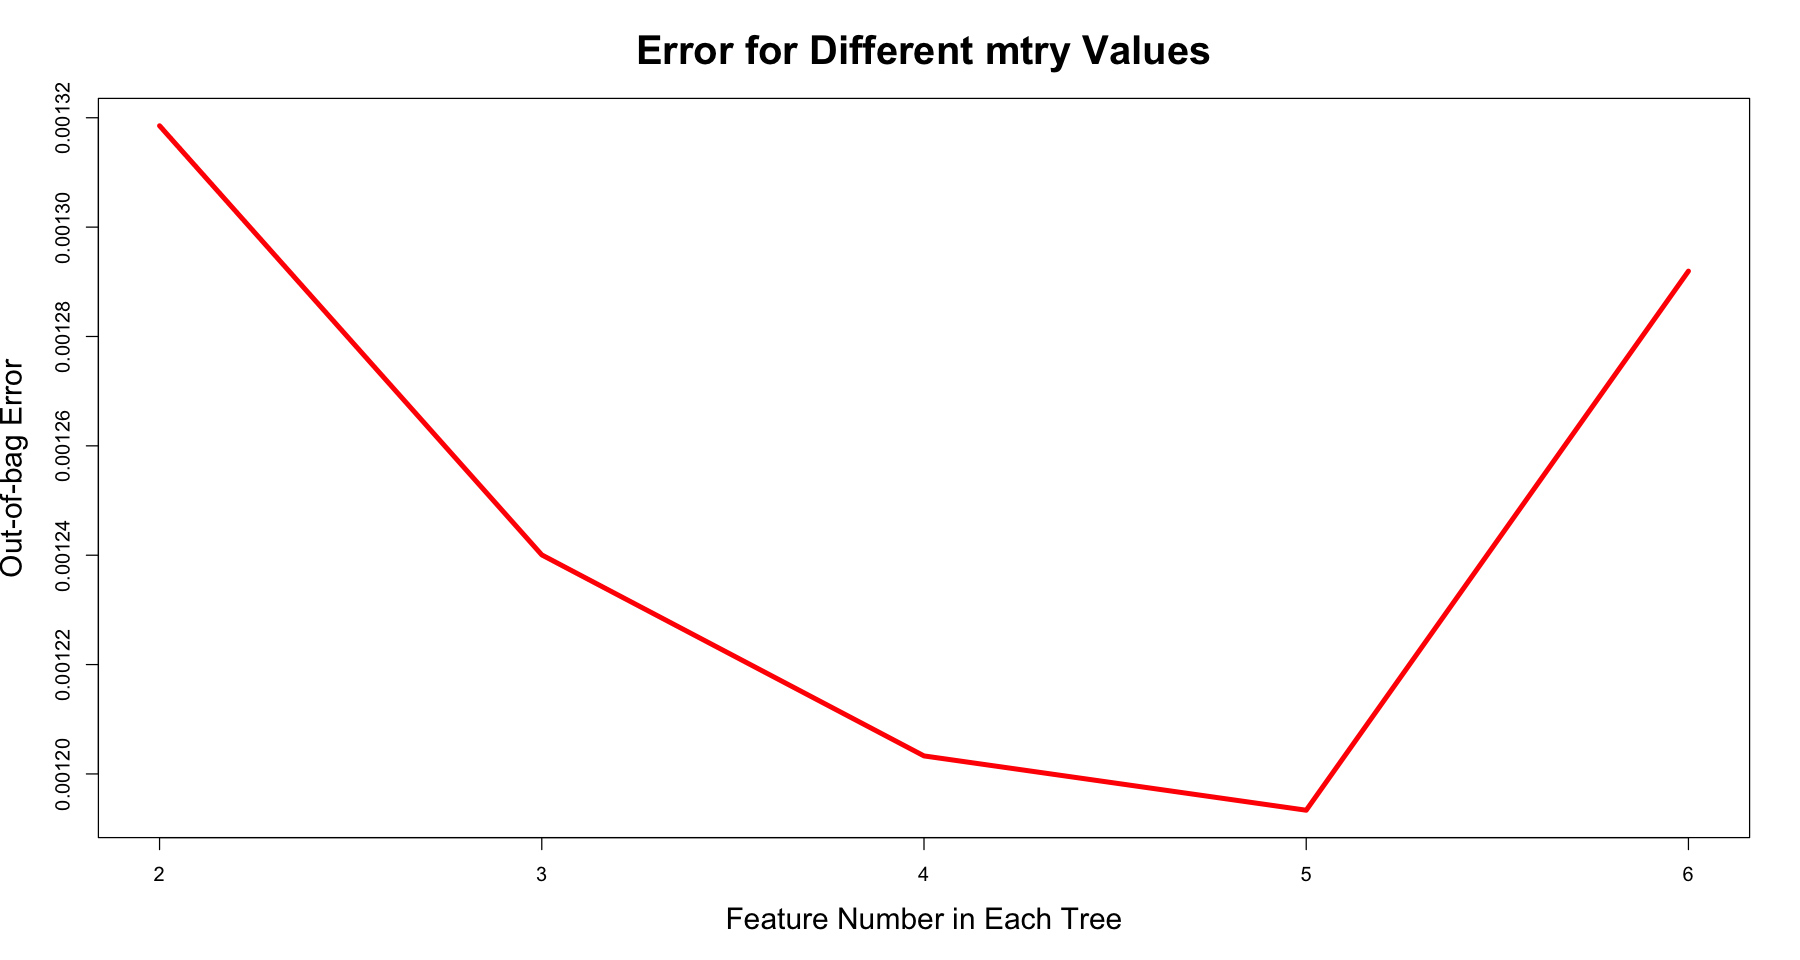

In [6]:
options(repr.plot.width=15, repr.plot.height=8)

plot(test$"c(2, 3, 4, 5, 6)",
     test$"as.data.frame(t(cbind(mse1, mse2, mse3, mse4, mse5)))[, c(200)]",
     type ='l',lwd = "4",xlab = "Feature Number in Each Tree", ylab = "Out-of-bag Error",col = "red",cex.lab=1.5)

title(main = list("Error for Different mtry Values", cex = 2, col = "black", font = 2))